# Subtask 1



Download the file task1.csv. It contains 250 rows, each of
three values. The values in the first and second columns are independent variable
values. The values in the third column are the corresponding dependent variable
values. The problem that the dataset represents is one of regression.
Using Python combined with the data to fit one linear model of your choice and
one non-linear model of your choice to the data. State which of these two models
you think would do a better job of generalising to a new dataset, briefly justifying
your answer. You may want to design your methodology to produce evidence to
support your justification.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Data Loading
File from blackboard



In [2]:
df = pd.read_csv ("task1.csv")
df.head()

,x1,x2,y
0,1.792647,3.072193,-10.676982
1,0.238110,3.627590,-13.170263
2,1.738925,2.325234,-9.128926
3,2.643709,3.645074,-11.224060
4,2.799200,3.451439,-10.779362


# Descriving the data


In [3]:
df.describe() 

,x1,x2,y
count,250.000000,250.000000,250.000000
mean,0.795640,3.029986,-11.098718
std,1.154436,0.558043,1.293773
min,-0.947992,2.009264,-14.028867
25%,-0.290933,2.554612,-12.108752
50%,0.713746,3.021558,-11.003394
75%,1.770248,3.531349,-10.132920
max,2.986547,3.999435,-8.131342


## Data Preparation
Splitting data into features (independant variable) and Target (dependant variable)


In [4]:
X = df.iloc[:,0:2] #No need to reshape: already have more than one value per row
y = df.iloc[:,2]

## Plotting the Data in three dimensional space.
the plotting is unclear though and its mainly needed for classification though. I tried to just check it.

Text(0.5, 0, 'y')

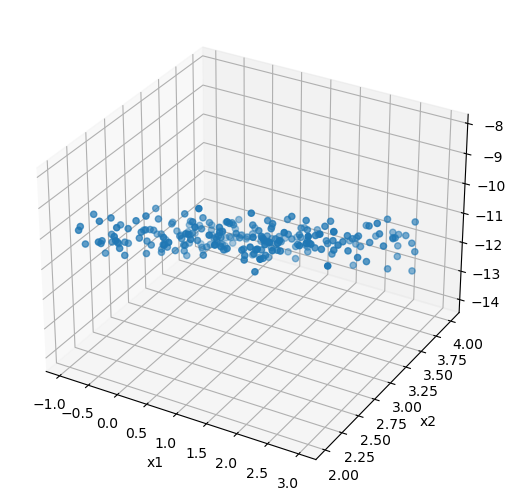

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y)

ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

This plot is just showing the relation between x1,x2 and dependant variable y. So its not that much needed in #Regression

## 3D PLot Wireframe to check the relation between Variables


In [12]:
from sklearn.metrics import mean_squared_error

reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)



LinearRegression(fit_intercept=False)

In [14]:
#...and then, based on our regression model, calculate the response variable value at each grid point.
y_plane = x1*reg.coef_[0]+x2*reg.coef_[1]
y_plane

array([[ -6.21807118,  -7.14728464,  -8.0764981 ,  -9.00571155,
         -9.93492501, -10.86413847, -11.79335192, -12.72256538,
        -13.65177884, -14.58099229, -15.51020575, -16.43941921],
       [ -6.0038077 ,  -6.93302116,  -7.86223462,  -8.79144807,
         -9.72066153, -10.64987499, -11.57908844, -12.5083019 ,
        -13.43751536, -14.36672882, -15.29594227, -16.22515573],
       [ -5.78954422,  -6.71875768,  -7.64797114,  -8.57718459,
         -9.50639805, -10.43561151, -11.36482496, -12.29403842,
        -13.22325188, -14.15246534, -15.08167879, -16.01089225],
       [ -5.57528074,  -6.5044942 ,  -7.43370766,  -8.36292111,
         -9.29213457, -10.22134803, -11.15056149, -12.07977494,
        -13.0089884 , -13.93820186, -14.86741531, -15.79662877],
       [ -5.36101726,  -6.29023072,  -7.21944418,  -8.14865763,
         -9.07787109, -10.00708455, -10.93629801, -11.86551146,
        -12.79472492, -13.72393838, -14.65315183, -15.58236529],
       [ -5.14675378,  -6.07596724,

Text(0.5, 0, 'y')

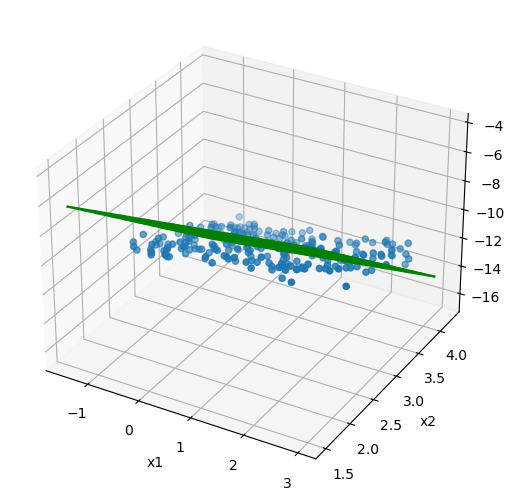

In [15]:
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y)
#We can use plot_surface, but I think that a wireframe is clearer: it doesn't obscure the points.
ax.plot_wireframe(x1,x2,y_plane,color='green')


ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your fitted model and 'X' is your features dataframe
x1_range = np.linspace(X.iloc[:,0].min(), X.iloc[:,0].max(), 100)
x2_range = np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_pred_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

plt.contourf(x1_grid, x2_grid, y_pred_grid, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Model Predictions Contour Plot')
plt.show()


NameError: name 'model' is not defined

It reperents that linear model fits the data in 3D context and it generalizes the model.

## Scatter MATRIX
Finding the pattern ,outliers or features.

array([[<Axes: xlabel='x1', ylabel='x1'>,
        <Axes: xlabel='x2', ylabel='x1'>,
        <Axes: xlabel='y', ylabel='x1'>],
       [<Axes: xlabel='x1', ylabel='x2'>,
        <Axes: xlabel='x2', ylabel='x2'>,
        <Axes: xlabel='y', ylabel='x2'>],
       [<Axes: xlabel='x1', ylabel='y'>, <Axes: xlabel='x2', ylabel='y'>,
        <Axes: xlabel='y', ylabel='y'>]], dtype=object)

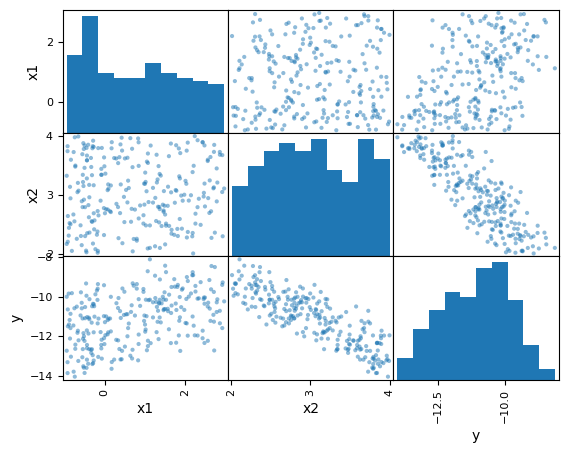

In [23]:
#3D plots can be difficult to interpret. We can complement them with a scatter matrix (often used at an
#earlier stage in the process).
pd.plotting.scatter_matrix(df)

Relationship between each pair of variables.Histogram is providing insights in the distribution of variables.
Here we can also see what is relationship of x1,x2 and y patterns are in the Data.

## Splitting the Data
It is neseccary for splitting the data to check the performance of the model.


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #here test set is 20%, couldbe 25%,30%


## Grid search code with cross validation
To find out the different combinations of hypermeters and seltect the best ones based on cross validation performance.

### SVR

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [1, 10],  #cotrols the penalty for misclassification
    'gamma': ['auto'],  #defines the influence of a single training example
    'kernel': ['rbf', 'linear','poly']  # kernel for the model the best settings through 5 kfold validation'
}

# Create the SVR model
svr = SVR()

# Set up the grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)#Intializing Gridsearch and it shoult use 
#5 k fold validation,optimize the R^2 scoring metric, using all cores and verbose=2 to to give detailed information.

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (R^2):", grid_search.best_score_)

# To use the best model found by the grid search:
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best score (R^2): 0.9096836961236218


The result is meaning the model configuration found by grid search which is a SVR model with C=1 and linear kernel.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_test and y_test are test features and labels
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.13056429409421175
R^2 Score: 0.9105205824235685


### Linear Regression
Finding MSE and R^2 Score

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Fit the model to the training data
y_pred_linear = linear_model.predict(X_test)  # Make predictions on the test data

# Evaluate the model
r2_linear = r2_score(y_test, y_pred_linear)  # Calculate R^2 score
mse_linear = mean_squared_error(y_test, y_pred_linear)  # Calculate MSE

# Print the evaluation metrics
print(f"Linear Model R^2: {r2_linear}")
print(f"Linear Model MSE: {mse_linear}")



Linear Model R^2: 0.9112693176413127
Linear Model MSE: 0.12947177373795501


### Non-Linear model(Random Forrest)

In [28]:
from sklearn.ensemble import RandomForestRegressor


non_linear_model = RandomForestRegressor(random_state=42)
non_linear_model.fit(X_train, y_train)
y_pred_non_linear = non_linear_model.predict(X_test)

# Evaluate the model's performance
r2_non_linear = r2_score(y_test, y_pred_non_linear)
mse_non_linear = mean_squared_error(y_test, y_pred_non_linear)

print(f"Non-Linear Model R^2: {r2_non_linear}")
print(f"Non-Linear Model MSE: {mse_non_linear}")



Non-Linear Model R^2: 0.8877234776044125
Non-Linear Model MSE: 0.16382879199466352


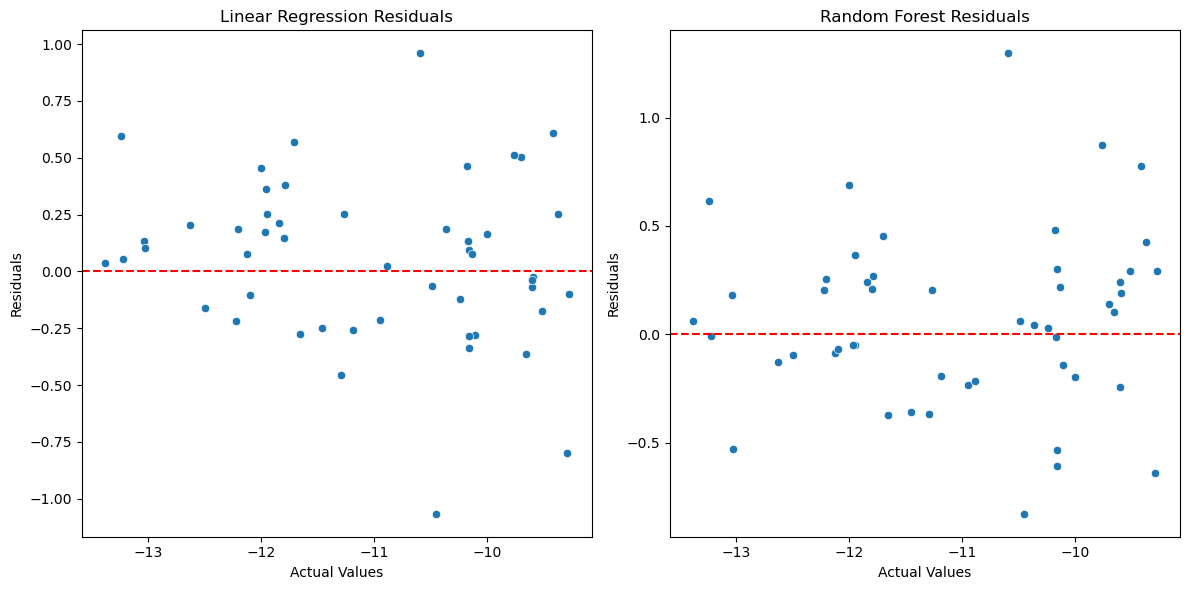

In [20]:
import seaborn as sns

residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Linear Regression Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


#### Data is more congested on linear regression residuals.

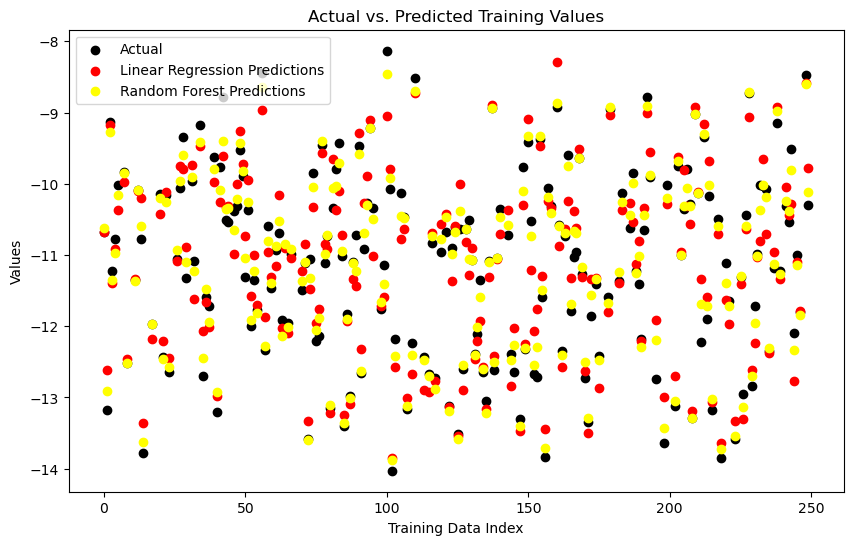

In [28]:
# Predictions on the training set
y_train_pred_lr = lr_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)

# Plotting
plt.figure(figsize=(10, 6))

# Actual vs. Predicted values from Linear Regression
plt.scatter(X_train.index, y_train, color='black', label='Actual', alpha=1)
plt.scatter(X_train.index, y_train_pred_lr, color='red', label='Linear Regression Predictions', alpha=1)

# Actual vs. Predicted values from Random Forest
plt.scatter(X_train.index, y_train_pred_rf, color='yellow', label='Random Forest Predictions', alpha=1)

plt.title('Actual vs. Predicted Training Values')
plt.xlabel('Training Data Index')
plt.ylabel('Values')
plt.legend()
plt.show()


## Justification
#### 1.Test Size: 
Test size is taken 20% because it impacts the model evaluation by balancing the need for a sufficient train data which is 80%.
#### 2. Model Fitting trial:
Choosing between SVR, Random Forrest, and Linear Regression depends on the data's complexity and linear or non-linear relationships. One of the trial model SVR is chosen for potentially complex, non-linear patterns while minimizing the prediction error.(Sethi, 2024). The Random Forrest added because its a ensemble method that can handle both linear and non-linear data effectively. It improves model accuracy and robustness by aggregating prredictions from multiple decision tree reducing the risk of overfitting.(Breiman, 2001) and It is the simplest model and provides a good baseline
#### 3. SVR hypermeters: 
It was chosen to balance the trade off between model complexity and the risk of overfitting.
#### 4. R^2 and MSE interpretation:
With a higher value of R^2 provides that it generalizes more means the better fit. In our experiment Linear Model R^2 is much than other two which is 0.911. and the mean squared error is less in linear regression than the other two.
So , in my justification linear regression fits the data more .(James et al., 2013)


## References:

Breiman, L. (2001) Random forests - machine learning, SpringerLink. Available at: https://link.springer.com/article/10.1023/A:1010933404324 (Accessed: 04 March 2024).

James, G. et al. (2013) An introduction to statistical learning, SpringerLink. Available at: https://link.springer.com/book/10.1007/978-1-4614-7138-7 (Accessed: 04 March 2024).

Sethi, A. (2024) Support vector regression tutorial for machine learning, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/ (Accessed: 04 March 2024). 

















# Subtask 2


Your colleague wants to create a predictive model and has been asked by their
manager to fit a multi-layer perceptron (MLP) to some existing data which their
employer holds. They know enough about MLPs to have heard of a “learning rate”
and to know that it has an impact on performance. However, they don’t know what
the learning rate does, nor what value to choose for it.
The colleague sends you an email asking you:

• what a learning rate is in the context of an MLP,

• how it relates to algorithm and model performance,

• what the best value to set their learning rate to is.

You don’t know the details of their dataset and have no chance to explore it before
responding.
Write a short response to your colleague’s email. You should focus on giving them
the information that they are asking for but may go beyond a direct point-by-point
response if you feel that any of their questions show a lack of understanding which
you might helpfully correct. In this case, you should explain their misconception
and give them some additional advice which you think would help them to meet
their aims.


# Solution of SubTask 2:
### The Email of my response:


##### Subject: Learning rate in the context of MLP
Dear Colleague,

I hope you are doing well. The learning rate in the context of Multilayer perceptron(MlP), a type of neural network, is a crucial hyperparameter that influences how much we adjust the weights of our network concerning the loss gradient. A higher learning rate means we are teaching the machine to learn aggressively, like if you want to teach a child to walk. You can force him(high learning rate) or let the child learn how to getup, hold something to stand and make him to walk with a tiny step. (slow learning rate). 
So, as for multilayer perceptron, we are giving learning rates to the algorithm. A high learning rate may cause the model to converge quickly, but it risks overshooting the minimum. And slow learning rate can increase the training time and possibly getting stuck in local minima.
It is directly tied to the performance of MLP. An optimal learning rate ensures efficiency in training and convergence to a global minimum of the loss function, thus improving the model accuracy. However, there’s no one size that fits all values. It largely depends on the dataset's specific characteristics and the MLP's architecture.
Finding the actual and optimised learning rate typically involves experimentation. The techniques to optimize the learning rate are:

•	Learning rate schedules: Gradually decrease the learning rate as training progresses.

•	Adaptive learning rates: Adam, AdaGrad and so on adjust the learning rate dynamically (Luo et al., 2019)

To aid in selecting an initial learning rate, you could start with a smaller number, like .001, gradually increase it, and see what happens in model performance. Moreover, applying the techniques I mentioned before can be very beneficial here.
Remember, Learning rate is one of many parameters affecting your MLP’s performance. And always consider all others things like number of layers, the number of neurons in each layer, and the regularization techniques.


Here are some video links and essential references you can watch or read for better understanding.

•	https://www.youtube.com/watch?v=tUoUdOdTkRw&ab_channel=MaheshHuddar

•	Thota, L.S. and Changalasetty, S.B., 2013. Optimum learning rate for classification problem with MLP in data mining. International Journal of Advances in Engineering & Technology, 6(1), p.35.

•	He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition.. https://doi.org/10.1109/cvpr.2016.90


•	Luo, L. et al. (2019) Adaptive gradient methods with dynamic bound of learning rate, arXiv.org. Available at: https://arxiv.org/abs/1902.09843 (Accessed: 05 March 2024).


Thank you. Hope you will understand. If anything remain un-understanding do knock me anytime.

Best Regards,

Asif Tanvir.


